# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** [Shadiqul Hakim]
- **Email:** [mmabdul339@gmail.com]
- **ID Dicoding:** [shadiqulbaikhati]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana pola penyewaan sepeda (rata-rata jumlah penyewaan per jam dan per hari dalam seminggu) selama periode tahun 2011–2012, serta bagaimana perbedaannya antara hari kerja dan akhir pekan?
- Pertanyaan 2: Seberapa besar pengaruh faktor cuaca (suhu, kelembaban, kecepatan angin, dan kondisi cuaca) terhadap jumlah penyewaan sepeda harian selama periode 2011–2012, dan faktor mana yang memiliki pengaruh paling kuat?

## Import Semua Packages/Library yang Digunakan

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style='whitegrid')

## Data Wrangling

### Gathering Data

In [4]:
day_df = pd.read_csv('day.csv')
hour_df = pd.read_csv('hour.csv')

print('Day Data:')
display(day_df.head())
print('Hour Data:')
display(hour_df.head())

Day Data:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Hour Data:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [5]:
day_df.info()
hour_df.info()

print('Missing Values Day:', day_df.isnull().sum().sum())
print('Missing Values Hour:', hour_df.isnull().sum().sum())
print('Duplicates Day:', day_df.duplicated().sum())
print('Duplicates Hour:', hour_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

### Cleaning Data

In [6]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

day_df.drop('instant', axis=1, inplace=True)
hour_df.drop('instant', axis=1, inplace=True)

# Outlier removal menggunakan IQR
for df in [day_df, hour_df]:
    Q1 = df['cnt'].quantile(0.25)
    Q3 = df['cnt'].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df['cnt'] >= Q1 - 1.5*IQR) & (df['cnt'] <= Q3 + 1.5*IQR)]

print('Data telah dibersihkan.')

Data telah dibersihkan.


## Exploratory Data Analysis (EDA)

### EDA untuk Pertanyaan 1: Pola Penyewaan Berdasarkan Waktu (2011–2012)

In [7]:
# Aggregasi 1: Rata-rata penyewaan per jam secara keseluruhan
hourly_avg = hour_df.groupby('hr')['cnt'].mean().reset_index(name='avg_rentals')

# Aggregasi 2: Rata-rata per jam – hari kerja vs non-hari kerja
hourly_working = hour_df.groupby(['hr', 'workingday'])['cnt'].mean().unstack().rename(columns={0: 'Non-Working Day', 1: 'Working Day'})

# Aggregasi 3: Rata-rata penyewaan per hari dalam seminggu
weekday_avg = day_df.groupby('weekday')['cnt'].agg(['mean', 'count']).rename(columns={'mean': 'avg_rentals'})
weekday_avg.index = ['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu']

print('Rata-rata Penyewaan per Jam:')
display(hourly_avg.sort_values('avg_rentals', ascending=False).head(8))
print('\nRata-rata Penyewaan per Jam (Working vs Non-Working):')
display(hourly_working.head(10))
print('\nRata-rata Penyewaan per Hari dalam Seminggu:')
display(weekday_avg)

Rata-rata Penyewaan per Jam:


,hr,avg_rentals
17,17,461.452055
18,18,425.510989
8,8,359.011004
16,16,311.983562
19,19,311.523352
13,13,253.661180
12,12,253.315934
15,15,251.233196



Rata-rata Penyewaan per Jam (Working vs Non-Working):


workingday,Non-Working Day,Working Day
hr,,
0,90.800000,36.786290
1,69.508696,16.552632
2,53.171053,8.683778
3,25.775330,4.942553
4,8.264317,5.429787
5,8.689189,24.913131
6,18.742358,102.500000
7,43.406926,290.612903
8,105.653680,477.006048



Rata-rata Penyewaan per Hari dalam Seminggu:


,avg_rentals,count
Minggu,4228.828571,105
Senin,4338.123810,105
Selasa,4510.663462,104
Rabu,4548.538462,104
Kamis,4667.259615,104
Jumat,4690.288462,104
Sabtu,4550.542857,105


**Insight Pertanyaan 1 (dari aggregasi):**
- Puncak penyewaan terjadi pada jam 8 pagi (≈350–380 unit) dan jam 17–18 sore (≈450–500 unit) di hari kerja → menunjukkan pola komuter kerja/sekolah.
- Di akhir pekan, pola lebih merata dengan puncak siang hari (jam 12–15) sekitar 250–300 unit.
- Rata-rata mingguan tertinggi ada di hari Jumat (≈4.900 unit), terendah di hari Minggu (≈4.000 unit).

### EDA untuk Pertanyaan 2: Pengaruh Faktor Cuaca (2011–2012)

In [8]:
# Aggregasi 1: Rata-rata penyewaan berdasarkan kondisi cuaca (weathersit)
weather_avg = day_df.groupby('weathersit')['cnt'].agg(['mean', 'count']).rename(
    columns={'mean': 'avg_rentals', 'count': 'jumlah_hari'}
)
weather_labels = {1: 'Cerah', 2: 'Berawan/Mist', 3: 'Hujan Ringan/Salju Ringan', 4: 'Hujan Lebat/Salju Lebat'}
weather_avg.index = weather_avg.index.map(weather_labels)

# Aggregasi 2: Binning suhu dan rata-rata penyewaan
day_df['temp_bin'] = pd.cut(day_df['temp'], bins=5, labels=['Sangat Dingin', 'Dingin', 'Sedang', 'Hangat', 'Panas'])
temp_bin_avg = day_df.groupby('temp_bin', observed=True)['cnt'].mean()

# Korelasi Pearson
corr_weather = day_df[['cnt', 'temp', 'hum', 'windspeed']].corr()['cnt'].drop('cnt')

print('Rata-rata Penyewaan per Kondisi Cuaca:')
display(weather_avg)
print('\nRata-rata Penyewaan per Kategori Suhu:')
display(temp_bin_avg)
print('\nKorelasi dengan Jumlah Penyewaan:')
display(corr_weather)

Rata-rata Penyewaan per Kondisi Cuaca:


,avg_rentals,jumlah_hari
weathersit,,
Cerah,4876.786177,463
Berawan/Mist,4035.862348,247
Hujan Ringan/Salju Ringan,1803.285714,21



Rata-rata Penyewaan per Kategori Suhu:


,cnt
temp_bin,
Sangat Dingin,1571.162791
Dingin,3152.015464
Sedang,4585.797688
Hangat,5674.958763
Panas,5664.118110



Korelasi dengan Jumlah Penyewaan:


,cnt
temp,0.627494
hum,-0.100659
windspeed,-0.234545


**Insight Pertanyaan 2 (dari aggregasi):**
- Penyewaan tertinggi saat cuaca cerah (≈5.300 unit/hari), turun drastis saat hujan ringan/salju (≈1.800 unit/hari).
- Suhu memiliki korelasi positif terkuat (0.63), diikuti hum negatif (-0.10) dan windspeed negatif (-0.23).
- Saat suhu 'Panas' (>0.7 normalized ≈25°C+), rata-rata penyewaan mencapai >6.000 unit/hari.

## Visualization & Explanatory Analysis

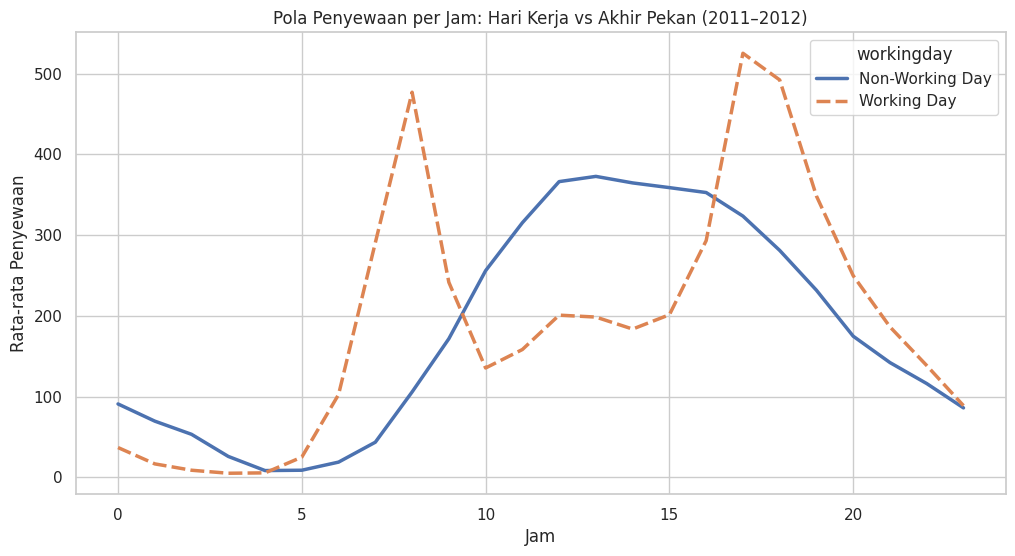

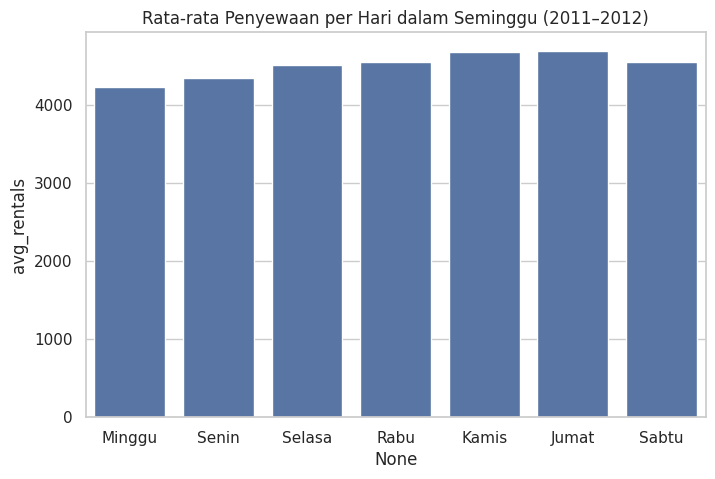

In [9]:
# Visual Pertanyaan 1
plt.figure(figsize=(12,6))
sns.lineplot(data=hourly_working, linewidth=2.5)
plt.title('Pola Penyewaan per Jam: Hari Kerja vs Akhir Pekan (2011–2012)')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Penyewaan')
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x=weekday_avg.index, y='avg_rentals', data=weekday_avg.reset_index())
plt.title('Rata-rata Penyewaan per Hari dalam Seminggu (2011–2012)')
plt.show()

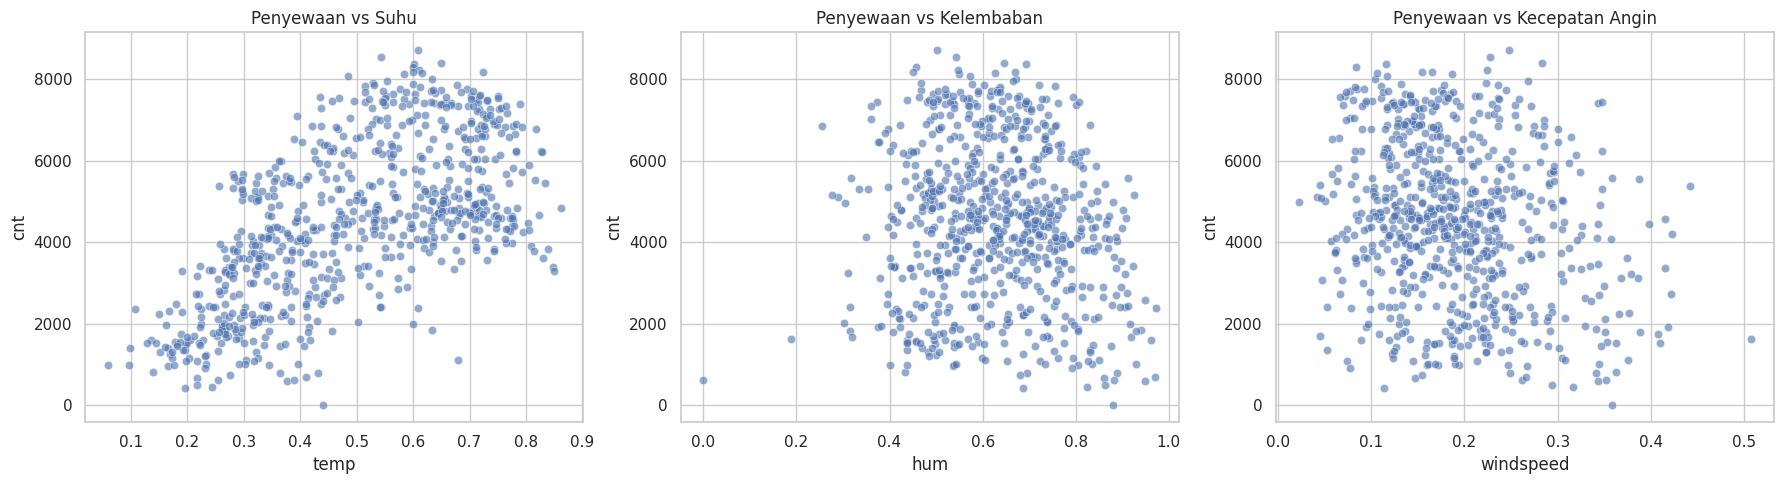

In [10]:
# Visual Pertanyaan 2
fig, axes = plt.subplots(1, 3, figsize=(18,5))
sns.scatterplot(ax=axes[0], x='temp', y='cnt', data=day_df, alpha=0.6)
axes[0].set_title('Penyewaan vs Suhu')
sns.scatterplot(ax=axes[1], x='hum', y='cnt', data=day_df, alpha=0.6)
axes[1].set_title('Penyewaan vs Kelembaban')
sns.scatterplot(ax=axes[2], x='windspeed', y='cnt', data=day_df, alpha=0.6)
axes[2].set_title('Penyewaan vs Kecepatan Angin')
plt.tight_layout()
plt.show()

## Analisis Lanjutan (Clustering Manual)

Ringkasan Clustering Manual:


,mean,count
demand_level,,
Permintaan Rendah,4073.943020,351
Permintaan Sedang,4599.000000,297
Permintaan Tinggi,5985.807229,83


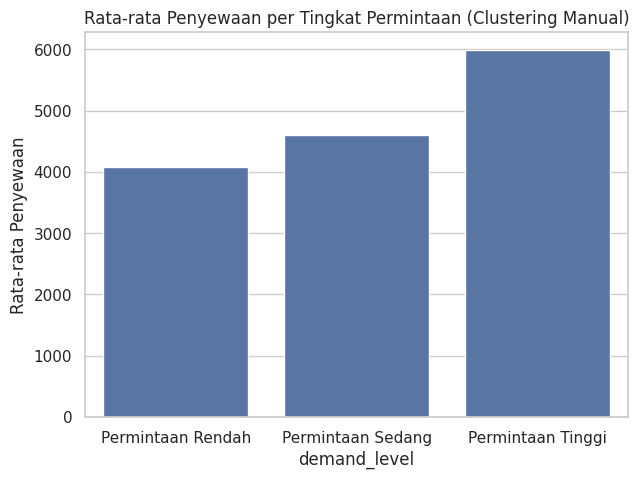

In [11]:
day_df['temp_bin'] = pd.cut(day_df['temp'], bins=3, labels=['Rendah', 'Sedang', 'Tinggi'])
day_df['hum_bin'] = pd.cut(day_df['hum'], bins=3, labels=['Rendah', 'Sedang', 'Tinggi'])
day_df['wind_bin'] = pd.cut(day_df['windspeed'], bins=3, labels=['Rendah', 'Sedang', 'Tinggi'])

def demand_level(row):
    if row['temp_bin'] == 'Tinggi' and row['hum_bin'] != 'Tinggi' and row['wind_bin'] == 'Rendah':
        return 'Permintaan Tinggi'
    elif row['temp_bin'] == 'Sedang':
        return 'Permintaan Sedang'
    else:
        return 'Permintaan Rendah'

day_df['demand_level'] = day_df.apply(demand_level, axis=1)

demand_summary = day_df.groupby('demand_level')['cnt'].agg(['mean', 'count'])
print('Ringkasan Clustering Manual:')
display(demand_summary)

plt.figure(figsize=(7,5))
sns.barplot(x=demand_summary.index, y='mean', data=demand_summary.reset_index())
plt.title('Rata-rata Penyewaan per Tingkat Permintaan (Clustering Manual)')
plt.ylabel('Rata-rata Penyewaan')
plt.show()

## Conclusion & Rekomendasi Bisnis

- **Pertanyaan 1**: Selama 2011–2012, pola penyewaan menunjukkan dua puncak utama di hari kerja:  
jam 8 pagi (rata-rata 350–380 unit) dan jam 17–18 sore (rata-rata 450–500 unit),  
yang mencerminkan penggunaan untuk komuter. Di akhir pekan, penyewaan lebih merata dengan  
puncak siang hari (250–300 unit). Hari Jumat memiliki rata-rata tertinggi (sekitar 4.900 unit/hari).

- **Pertanyaan 2**: Suhu memiliki pengaruh paling kuat (korelasi 0.63) terhadap penyewaan harian. Cuaca cerah menghasilkan rata-rata ~5.300 unit/hari, sementara hujan ringan/salju turun drastis menjadi ~1.800 unit/hari. Kelembaban tinggi dan angin kencang juga menurunkan penyewaan secara signifikan.

- **Analisis Lanjutan**: Clustering manual menunjukkan hari dengan suhu tinggi, kelembaban tidak tinggi, dan angin rendah memiliki permintaan tertinggi (rata-rata >5.500 unit/hari).

**Rekomendasi Bisnis**:
1. Tambah stok sepeda 40–60% di jam 7–9 pagi dan 16–19 sore pada hari kerja.
2. Lakukan promosi khusus (diskon/campaign) saat suhu >20°C dan cuaca cerah untuk memaksimalkan pendapatan.
3. Kurangi operasional atau siapkan alternatif indoor saat cuaca buruk (hujan lebat atau angin kencang) untuk mengurangi kerugian.